## Importing libraries

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Data Pre-Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

# Machine learning
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras import losses
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

print(tf.__version__)
print(tf.keras.__version__)
np.random.seed(5)

2.3.0
2.4.0


### Importing the dataset

In [3]:
data = pd.read_csv('../data/diabetes-FINAL(PCA+FE).csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4,Gen_BvP_5,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Gen_t1_10,Outcome
0,2.490674,0.490065,-0.012325,1.154325,0.018495,-0.402945,0.201998,-0.384275,0.124657,0.030555,...,0,0,0,0,0,0,0,1,0,1
1,-1.602404,-0.918521,-0.212236,0.758356,0.630621,0.804378,0.566296,-0.381368,-0.186915,-0.137161,...,1,0,1,1,0,1,0,1,0,0
2,1.851160,-0.390550,-1.219694,-0.375196,-0.066938,-2.408254,1.042342,0.338790,-0.266549,0.107196,...,0,0,1,0,0,0,0,1,0,1
3,-2.619919,-0.991275,-0.326821,-0.659485,0.247009,0.307912,0.103035,-0.194544,0.282616,0.018554,...,1,1,1,1,1,0,0,1,0,0
4,-1.306145,1.570789,0.039245,2.709160,2.288982,-1.083394,-1.092380,-0.475775,0.017972,-0.057198,...,0,0,0,0,0,0,0,1,0,1


In [4]:
columns = list(data.columns)
print(columns)

['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Num_1', 'Num_2', 'Num_3', 'Num_4', 'Num_5', 'Gen_GvP_0', 'Gen_GvBP_1', 'Gen_GvI_2', 'Gen_GvA_3', 'Gen_BMI_4', 'Gen_BvP_5', 'Gen_AvP_6', 'Gen_GvB_7', 'Gen_BvS_8', 'Gen_BP_9', 'Gen_t1_10', 'Outcome']


## Input & Output Data

In [6]:
X = data[['PCA_0', 'PCA_1', 'PCA_5', 'PCA_8', 'Pregnancies', 
          'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
          'Age', 'Num_1', 'Num_2', 'Num_3', 'Num_4', 'Num_5', 'Gen_GvP_0', 
          'Gen_GvBP_1', 'Gen_GvI_2', 'Gen_GvA_3', 'Gen_BMI_4', 'Gen_BvP_5', 
          'Gen_AvP_6', 'Gen_GvB_7', 'Gen_BvS_8', 'Gen_BP_9', 'Gen_t1_10', 'Outcome']].iloc[:, 0:-1].values;
X.shape

(768, 27)

In [9]:
X.shape[1]

27

In [8]:
X[0].shape

(27,)

In [5]:
y = data['Outcome'].values;
y.shape

(768,)

## Data Splitting

Function to check best random state for splitting

In [7]:
differ=[]
for i in range(1000):
    xTrain,xTest,yTrain,yTest=tts(X, y, test_size=0.2, random_state=i)
    count_1 = np.sum(yTrain)
    count_0 = len(yTrain)-count_1
    diff = abs(count_0-count_1)
    differ.append(abs(diff))
print(min(differ), differ.index(min(differ)))

154 395


Splitting the data and details of the split

In [8]:
xTrain,xTest,yTrain,yTest=tts(X, y, test_size=0.2, random_state=395)
print('Train:')
print('1s:',np.sum(yTrain))
print('0s:',len(yTrain)-np.sum(yTrain))
print('Difference:', abs(len(yTrain)-np.sum(yTrain) - np.sum(yTrain)))
print('\nTest:')
print('1s:',np.sum(yTest))
print('0s:',len(yTest)-np.sum(yTest))
print('Difference:', abs(len(yTest)-np.sum(yTest) - np.sum(yTest)))

Train:
1s: 230
0s: 384
Difference: 154

Test:
1s: 38
0s: 116
Difference: 78


In [9]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(614, 27) (614,)
(154, 27) (154,)


# Model Training

## Hyper-Parameter Initialization

In [10]:
epochs = 200
lr = 0.2*0.01
decay = 0.1/epochs
adam = Adam(lr=lr, decay=decay)

## Model Architecture

In [11]:
input_dim=X.shape[1]

model=Sequential()
model.add(Dense(20, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

## Training

In [12]:
model_history = model.fit(xTrain, yTrain, batch_size=32, epochs=epochs, validation_data=(xTest, yTest))

Epoch 1/200
20/20 [==============================] - 1s 28ms/step - loss: 0.9273 - acc: 0.5033 - val_loss: 0.6876 - val_acc: 0.5649
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.7690 - acc: 0.5391 - val_loss: 0.5653 - val_acc: 0.7597
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6871 - acc: 0.6221 - val_loss: 0.5097 - val_acc: 0.8052
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6122 - acc: 0.6694 - val_loss: 0.4768 - val_acc: 0.8052
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5936 - acc: 0.6857 - val_loss: 0.4522 - val_acc: 0.8247
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 0.5557 - acc: 0.7248 - val_loss: 0.4386 - val_acc: 0.8117
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5563 - acc: 0.7134 - val_loss: 0.4310 - val_acc: 0.8117
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5104 - 

Epoch 63/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3768 - acc: 0.8599 - val_loss: 0.3668 - val_acc: 0.8377
Epoch 64/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3675 - acc: 0.8599 - val_loss: 0.3712 - val_acc: 0.8377
Epoch 65/200
20/20 [==============================] - 0s 4ms/step - loss: 0.3939 - acc: 0.8567 - val_loss: 0.3648 - val_acc: 0.8442
Epoch 66/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3904 - acc: 0.8664 - val_loss: 0.3649 - val_acc: 0.8442
Epoch 67/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3670 - acc: 0.8485 - val_loss: 0.3673 - val_acc: 0.8377
Epoch 68/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4022 - acc: 0.8485 - val_loss: 0.3624 - val_acc: 0.8442
Epoch 69/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3820 - acc: 0.8518 - val_loss: 0.3651 - val_acc: 0.8442
Epoch 70/200
20/20 [==============================] - 0s 3ms/step - loss: 0.

Epoch 125/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3357 - acc: 0.8811 - val_loss: 0.3513 - val_acc: 0.8377
Epoch 126/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3290 - acc: 0.8697 - val_loss: 0.3530 - val_acc: 0.8312
Epoch 127/200
20/20 [==============================] - 0s 4ms/step - loss: 0.3265 - acc: 0.8779 - val_loss: 0.3518 - val_acc: 0.8247
Epoch 128/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3281 - acc: 0.8779 - val_loss: 0.3533 - val_acc: 0.8312
Epoch 129/200
20/20 [==============================] - 0s 4ms/step - loss: 0.3284 - acc: 0.8746 - val_loss: 0.3540 - val_acc: 0.8247
Epoch 130/200
20/20 [==============================] - 0s 4ms/step - loss: 0.3262 - acc: 0.8779 - val_loss: 0.3521 - val_acc: 0.8247
Epoch 131/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3181 - acc: 0.8746 - val_loss: 0.3514 - val_acc: 0.8312
Epoch 132/200
20/20 [==============================] - 0s 3ms/step - 

## Loss, Accuracy Plots

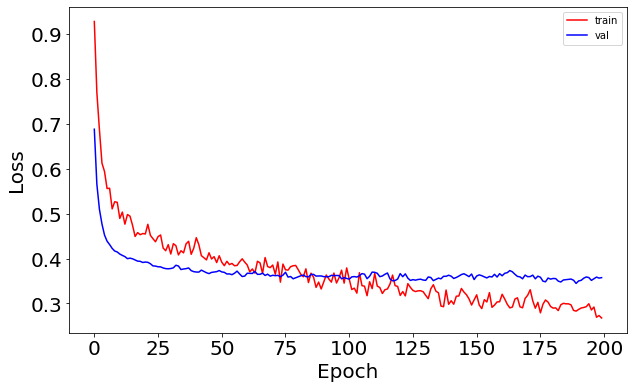

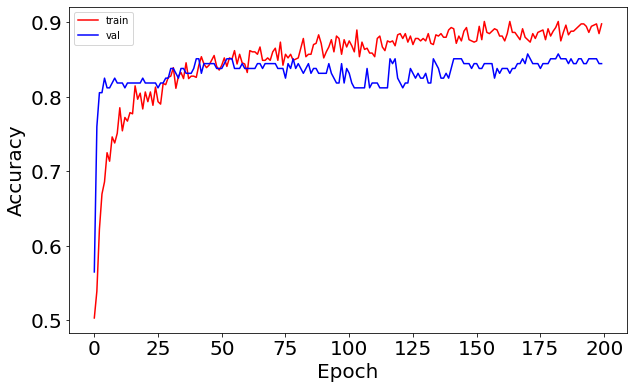

In [27]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(model_history.history['loss'], 'r', label='train')
ax.plot(model_history.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(model_history.history['acc'], 'r', label='train')
ax.plot(model_history.history['val_acc'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

## Testing on multiple Train-Test Splits

In [14]:
acc_scores = []
for i in range(1000):
    xTrain,xTest,yTrain,yTest=tts(X, y, test_size=0.2, random_state=i)
    pred = model.predict(xTest)
    pred_bn = pred>0.5
    acc_scores.append(accuracy_score(pred_bn, yTest))
print(np.mean(acc_scores))
print(np.std(acc_scores))

0.9011948051948052
0.02127784851854169


# Final Accuracy: 90.11%
# Final Standard Deviation: 2.12%

## Saving the model

In [15]:
#model.save('saved_models/20X20_90.11_2.12.h5')

## Loading the model

In [25]:
imported_model = tf.keras.models.load_model('20X20_90.11_2.12.h5')

In [26]:
imported_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                560       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________
